In [1]:
from pyforest import *

In [2]:
raw_data = pd.read_csv('../dataset/auto-mpg.csv')

<IPython.core.display.Javascript object>

In [3]:
raw_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
raw_data.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [5]:
raw_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
raw_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
raw_data.shape

(398, 9)

In [8]:
df = raw_data.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

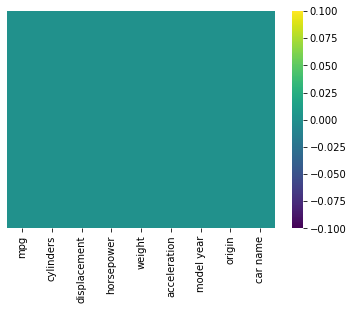

In [9]:
sns.heatmap(df.isna(), yticklabels=False, cmap='viridis')
plt.show()

In [10]:
df[~df['horsepower'].str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [11]:
df = df.replace('?', np.nan, regex=False)

<IPython.core.display.Javascript object>

In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
df['origin'] = df['origin'].map({1: 'america', 2: 'europe', 3: 'asia'})

In [14]:
df = df.drop('car name', axis=1)

In [15]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [16]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [17]:
df['horsepower'] = df['horsepower'].astype(float)

In [18]:
df = pd.get_dummies(df, 'origin')

<IPython.core.display.Javascript object>

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

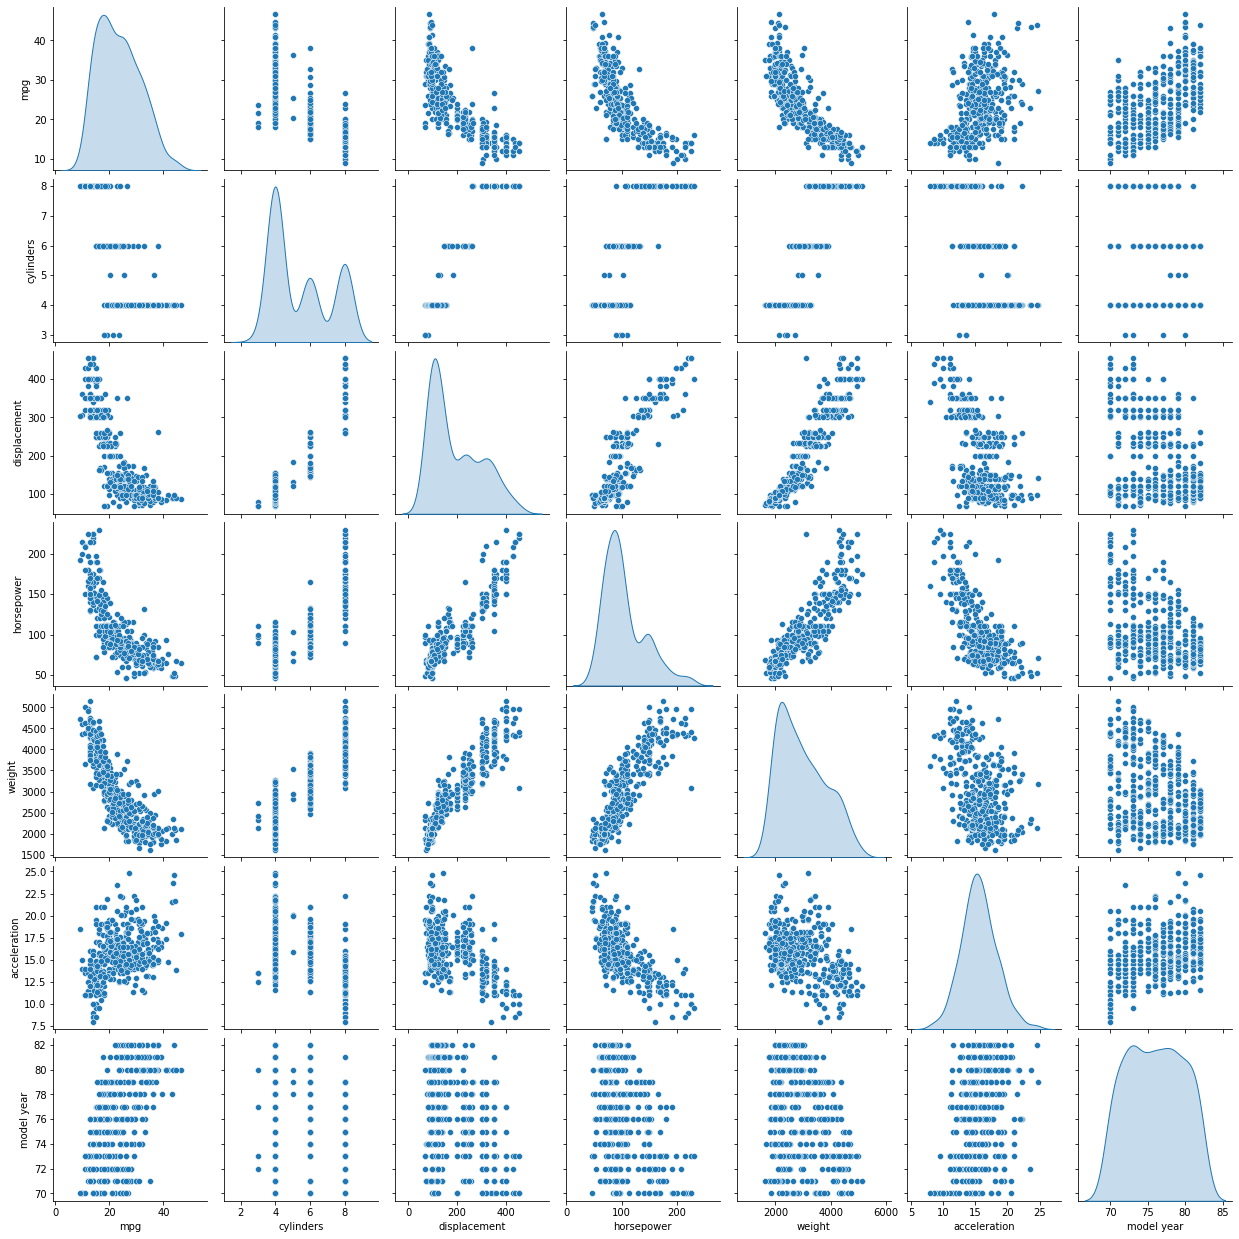

In [20]:
sns.pairplot(df.iloc[:, 0:7], diag_kind='kde')
plt.show()

In [21]:
df['log_mpg'] = np.log(df['mpg'])

<IPython.core.display.Javascript object>

In [23]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe,log_mpg
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,2.890372
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,2.708050
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,2.890372
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,2.772589
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,2.833213


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

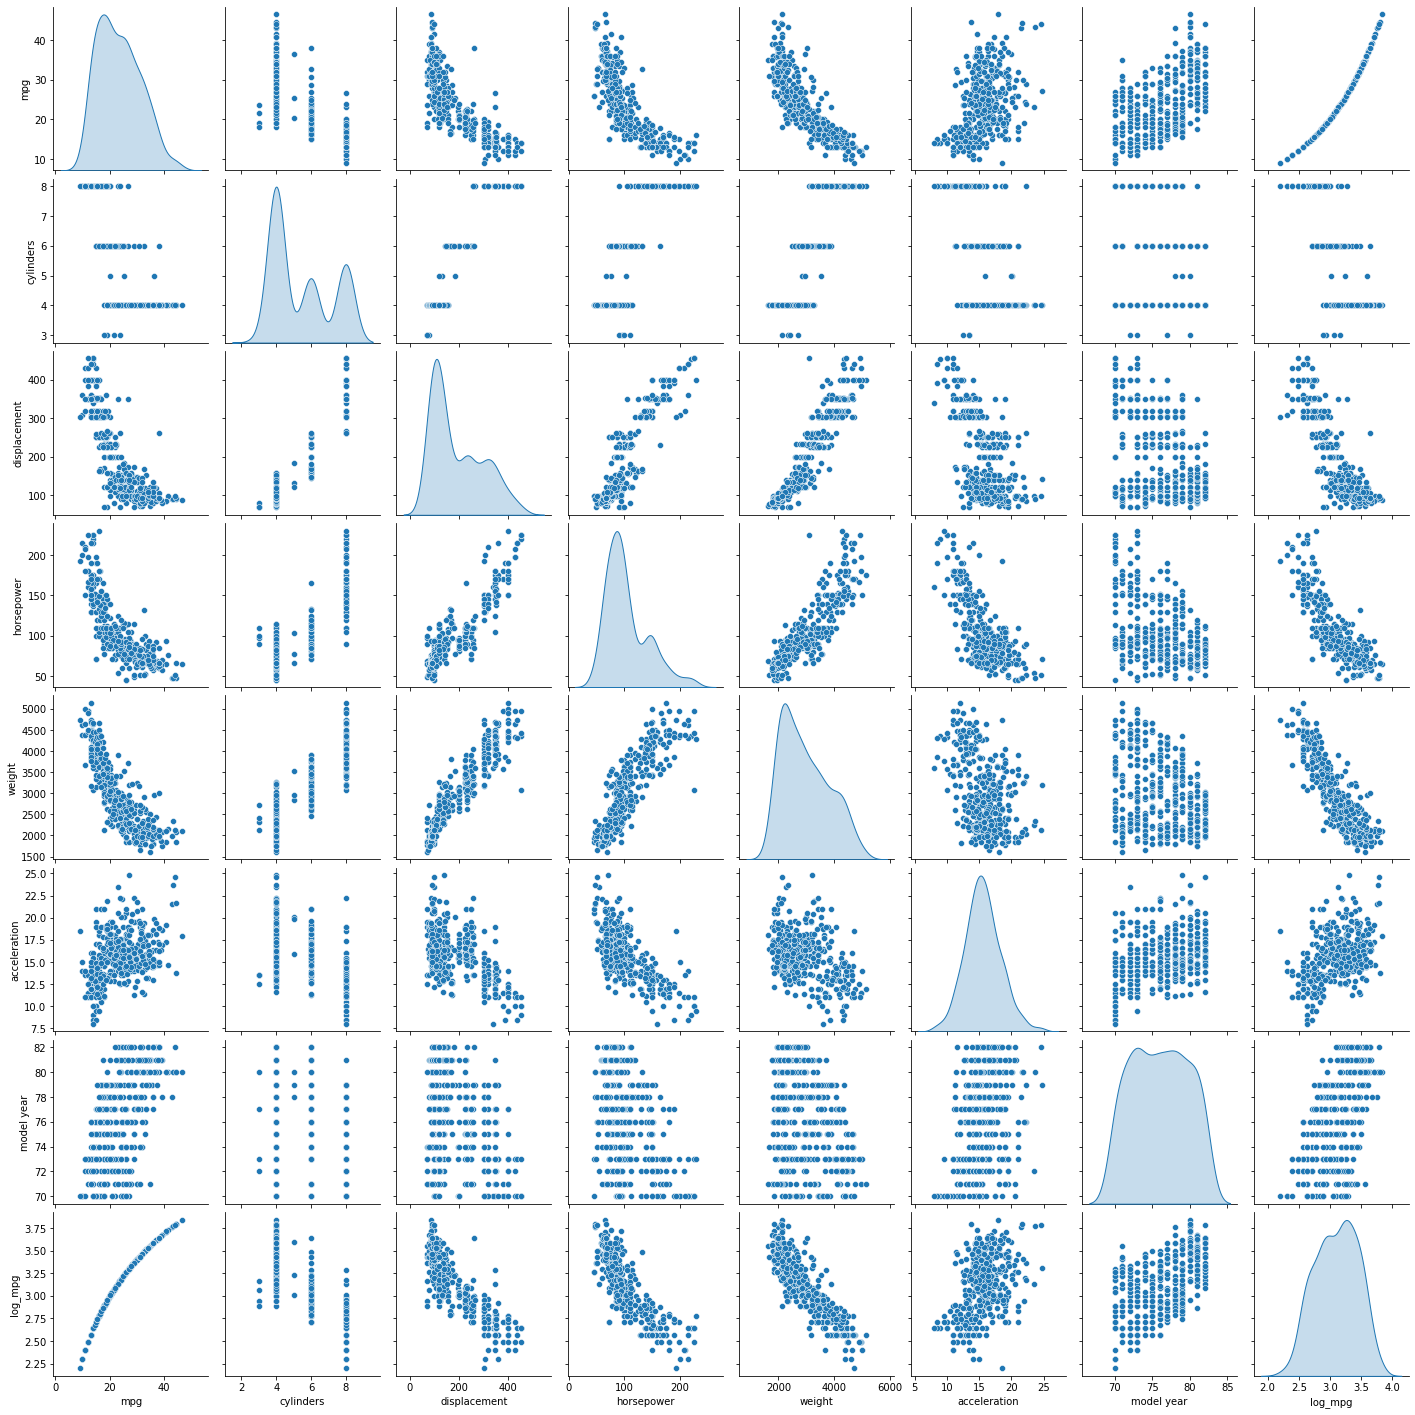

In [29]:
sns.pairplot(df.iloc[:, [0, 1, 2, 3, 4, 5, 6, -1]], diag_kind='kde')
plt.show()